# From Biological to Artificial Neurons

## The Perceptron

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris(as_frame=True)
X=iris.data[["petal length (cm)", "petal width (cm)"]].values
y=(iris.target==0) #Iris Setosa

per_clf=Perceptron(random_state=42)
per_clf.fit(X,y)

X_new=np.array([[1,3],[2,0.4]])
y_pred=per_clf.predict(X_new)
y_pred

array([False,  True])

In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(loss="perceptron",penalty=None,learning_rate="constant",eta0=1,random_state=42)
sgd_clf.fit(X,y)
assert (sgd_clf.coef_==per_clf.coef_).all()
assert (sgd_clf.intercept_==per_clf.intercept_).all()

## Regression MLPs

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

housing=fetch_california_housing()
X_train_full,X_test,y_full_train,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_full_train,random_state=42)


mlp_reg=MLPRegressor(hidden_layer_sizes=[50,50,50],random_state=42)
model=make_pipeline(StandardScaler(),mlp_reg)
model.fit(X_train,y_train)
y_pred=model.predict(X_valid)
rmse=root_mean_squared_error(y_valid,y_pred)

In [8]:
rmse

0.5053326657968762

## Classification MLPs

In [10]:
from sklearn.neural_network import MLPClassifier

X_train_full,X_test,y_full_train,y_test=train_test_split(iris.data,iris.target,test_size=0.1,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_full_train,test_size=0.1,random_state=42)

mlp_clf=MLPClassifier(hidden_layer_sizes=[5],max_iter=10000,random_state=42)
model=make_pipeline(StandardScaler(),mlp_clf)
model.fit(X_train,y_train)
accuracy=model.score(X_valid,y_valid)
accuracy


1.0

# Implementing MLPs with Keras

## Building an Image Classifier Using the Sequential API

In [13]:
import tensorflow as tf

fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist

X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]

In [14]:
X_train.shape

(55000, 28, 28)

In [15]:
X_train.dtype

dtype('uint8')

In [16]:
X_train,X_valid,X_test=X_train/255.,X_valid/255.,X_test/255.

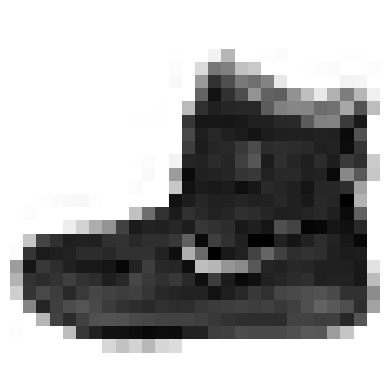

In [17]:
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")
plt.show()

In [18]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

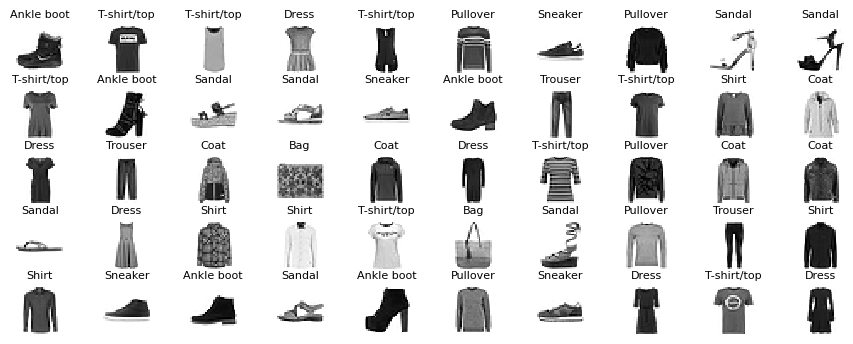

In [20]:
plt.figure(figsize=(11,4))
for idx,image_data in enumerate(X_train[:50]):
    plt.subplot(5,10,idx+1)
    plt.imshow(X_train[idx],cmap="binary",interpolation="nearest")
    plt.title(class_names[y_train[idx]],fontsize=8)
    plt.axis("off")
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

### Creating the model using Sequential API

In [22]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

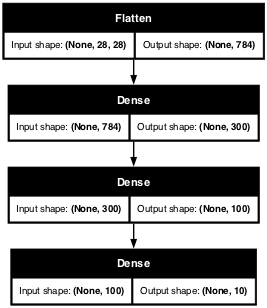

In [26]:
tf.keras.utils.plot_model(model,show_shapes=True,dpi=50)

In [27]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [28]:
hidden1=model.layers[1]

In [29]:
model.get_layer('dense') is hidden1

True

In [30]:
weights,biases=hidden1.get_weights()

In [31]:
weights

array([[ 0.0132953 , -0.00234266,  0.00998102, ...,  0.02653141,
        -0.03822199,  0.05023421],
       [-0.02550363, -0.00715776, -0.06193291, ...,  0.01377066,
        -0.0613119 ,  0.03062803],
       [ 0.02074243, -0.0412542 ,  0.02869426, ...,  0.05495219,
        -0.02631281,  0.07066703],
       ...,
       [ 0.02996934, -0.04090424,  0.05914655, ..., -0.00897619,
        -0.05611629, -0.05375471],
       [-0.0731755 , -0.0018345 , -0.01043648, ..., -0.0725381 ,
         0.02729118,  0.00953401],
       [-0.03751647,  0.04987945,  0.01152636, ...,  0.0465586 ,
         0.03811374,  0.01791043]], dtype=float32)

In [32]:
weights.shape

(784, 300)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
biases.shape

(300,)

#### Compiling the Model

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])


In [37]:
#this cell is equivalent to above cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
             optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy]
             )

In [38]:
tf.keras.utils.to_categorical([2,5,6,3],num_classes=10)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [39]:
np.argmax([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],
        axis=1)

array([2, 5, 6, 3])

#### Training and evaluating the model

In [41]:
history=model.fit(X_train,y_train,epochs=30,
                 validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - loss: 0.9661 - sparse_categorical_accuracy: 0.7023 - val_loss: 0.5077 - val_sparse_categorical_accuracy: 0.8256
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - loss: 0.5061 - sparse_categorical_accuracy: 0.8244 - val_loss: 0.4584 - val_sparse_categorical_accuracy: 0.8360
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - loss: 0.4545 - sparse_categorical_accuracy: 0.8424 - val_loss: 0.4348 - val_sparse_categorical_accuracy: 0.8434
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - loss: 0.4249 - sparse_categorical_accuracy: 0.8525 - val_loss: 0.4212 - val_sparse_categorical_accuracy: 0.8484
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - loss: 0.4034 - sparse_categorical_accuracy: 0.8586 - val_loss: 0.4091 - val_sparse_categorical_accuracy: 0.8500
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - loss: 0.3861 - sparse_categorical_accuracy: 0.8641 - val_loss: 0.3991 - val_sparse_categoric

In [42]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [43]:
print(history.epoch) 


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [44]:
df=pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.702765,0.770800,0.507726,0.8256
1,0.486916,0.830364,0.458383,0.8360
2,0.443336,0.845364,0.434813,0.8434
3,0.416464,0.854564,0.421244,0.8484
4,0.396501,0.860673,0.409125,0.8500


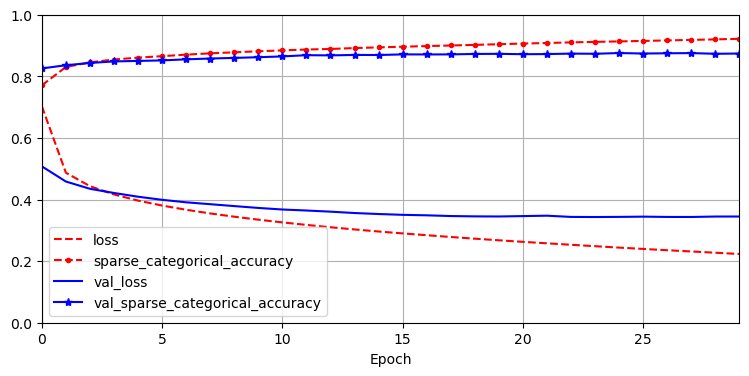

In [45]:
df.plot(figsize=(9,4),xlim=[0,29],ylim=[0,1],grid=True,xlabel="Epoch",style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [46]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.3703 - sparse_categorical_accuracy: 0.8728


[0.3673582375049591, 0.8726999759674072]

#### Using Model to make prediction

In [48]:
X_new=X_test[:5]
y_proba=model.predict(X_new)
y_proba.round(2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.01, 0.  , 0.85],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.18, 0.  , 0.01, 0.  , 0.  , 0.  , 0.81, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [49]:
y_pred=y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6])

In [50]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [51]:
y_new=y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

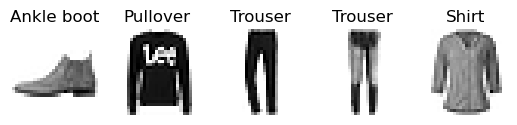

In [52]:
for idx,image in enumerate(X_new):
    plt.subplot(1,5,idx+1)
    plt.imshow(image,cmap="binary",interpolation="nearest")
    plt.title(class_names[y_test[idx]])
    plt.axis("off")
    

## Building a Regression MLP Using Sequential API

In [54]:
housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)
print(len(X_train),len(y_train))
print(len(X_valid),len(y_valid))
print(len(X_test),len(y_test))

11610 11610
3870 3870
5160 5160


In [55]:
X_train.shape

(11610, 8)

In [56]:
X_train.shape[1:]

(8,)

In [57]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=X_train.shape[1:]),
    tf.keras.layers.Normalization(name="normalization"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

norm_layer=model.get_layer("normalization")
norm_layer.adapt(X_train)
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])
history=model.fit(X_train,y_train,epochs=20,
                 validation_data=(X_valid,y_valid))
mse_test,rmse_test=model.evaluate(X_test,y_test)
X_new=X_test[:4]
y_pred=model.predict(X_new)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - RootMeanSquaredError: 1.1506 - loss: 1.4154 - val_RootMeanSquaredError: 0.6299 - val_loss: 0.3968
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - RootMeanSquaredError: 0.6346 - loss: 0.4030 - val_RootMeanSquaredError: 1.3137 - val_loss: 1.7259
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - RootMeanSquaredError: 0.6064 - loss: 0.3679 - val_RootMeanSquaredError: 1.3402 - val_loss: 1.7961
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - RootMeanSquaredError: 0.5971 - loss: 0.3566 - val_RootMeanSquaredError: 1.2140 - val_loss: 1.4738
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - RootMeanSquaredError: 0.5863 - loss: 0.3439 - val_RootMeanSquaredError: 1.0065 - val_loss: 1.0131
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - RootMeanSquaredError: 0.5789 - loss: 0.3353 - val_RootMeanSquaredError: 1.3535 - val_loss: 1.8319
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - RootMeanSquaredError

In [58]:
rmse_test

0.5309619307518005

In [59]:
y_pred

array([[0.5525608],
       [1.2848753],
       [4.9793763],
       [2.5554137]], dtype=float32)

In [60]:
y_test[:4]

array([0.477  , 0.458  , 5.00001, 2.186  ])

## Building Complex Models Using Functional API

In [62]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [63]:
normalized_layer=tf.keras.layers.Normalization()
normalized_layer.adapt(X_train)
hidden_layer1=tf.keras.layers.Dense(30,activation="relu")
hidden_layer2=tf.keras.layers.Dense(30,activation="relu")
concat_layer=tf.keras.layers.Concatenate()
output_layer=tf.keras.layers.Dense(1)

input_=tf.keras.layers.Input(shape=X_train.shape[1:])
normalized=normalized_layer(input_)
hidden1=hidden_layer1(normalized)
hidden2=hidden_layer2(hidden1)
concat=concat_layer([normalized,hidden2])
output=output_layer(concat)

model=tf.keras.Model(inputs=[input_],outputs=[output])


In [64]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [65]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])

history=model.fit(X_train,y_train,epochs=20,
                 validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)
y_pred=model.predict(X_new)

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - RootMeanSquaredError: 1.4985 - loss: 2.3979 - val_RootMeanSquaredError: 0.8765 - val_loss: 0.7683
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - RootMeanSquaredError: 0.6985 - loss: 0.4893 - val_RootMeanSquaredError: 1.3738 - val_loss: 1.8873
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - RootMeanSquaredError: 0.6431 - loss: 0.4140 - val_RootMeanSquaredError: 1.5213 - val_loss: 2.3144
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - RootMeanSquaredError: 0.6273 - loss: 0.3937 - val_RootMeanSquaredError: 1.7453 - val_loss: 3.0461
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - RootMeanSquaredError: 0.6170 - loss: 0.3809 - val_RootMeanSquaredError: 1.8714 - val_loss: 3.5023
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - RootMeanSquaredError: 0.6104 - loss: 0.3728 - val_RootMeanSquaredError: 1.6872 - val_loss: 2.8466
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - RootMeanSquaredError: 0.6029 - 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(4, 8))
  warnings.warn(msg)


##### wide and deep

In [67]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)


In [68]:
input_wide=tf.keras.layers.Input(shape=[5],name="wide_input")
input_deep=tf.keras.layers.Input(shape=[6],name="deep_input")
norm_layer_wide=tf.keras.layers.Normalization(name="wide_norm")
norm_layer_deep=tf.keras.layers.Normalization(name="deep_norm")

norm_wide=norm_layer_wide(input_wide)
norm_deep=norm_layer_deep(input_deep)
hidden1=tf.keras.layers.Dense(30,activation="relu",name="hidden1")(norm_deep)
hidden2=tf.keras.layers.Dense(30,activation="relu",name="hidden2")(hidden1)
concat=tf.keras.layers.concatenate([norm_wide,hidden2],name="concat_layer")
output=tf.keras.layers.Dense(1,name="output")(concat)
model=tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output],name="wide_deep_output")

In [69]:
model.summary()

Model: "wide_deep_output"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_norm           │ (None, 6)         │         13 │ deep_input[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden1 (Dense)     │ (None, 30)        │        210 │ deep_norm[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_norm           │ (None, 5)         │         11 │ wide_input[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden2 (Dense)     │ (None, 30)        │        930 │ hidden1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, 35)        │          0 │ wide_norm[0][0],  │
│ (Concatenate)       │                   │            │ hidden2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         36 │ concat_layer[0][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [70]:
X_train.shape

(11610, 8)

In [71]:
X_train_wide,X_train_deep=X_train[:,:5],X_train[:,2:]

In [72]:
X_train_wide.shape

(11610, 5)

In [73]:
X_train_deep.shape

(11610, 6)

In [74]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])

X_train_wide,X_train_deep=X_train[:,:5],X_train[:,2:]
X_valid_wide,X_valid_deep=X_valid[:,:5],X_valid[:,2:]
X_test_wide,X_test_deep=X_test[:,:5],X_test[:,2:]
X_new_wide,X_new_deep=X_test_wide[:3],X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history=model.fit((X_train_wide,X_train_deep),y_train,epochs=20,
                 validation_data=((X_valid_wide,X_valid_deep),y_valid))
mse=model.evaluate((X_test_wide,X_test_deep),y_test)
y_pred=model.predict((X_new_wide,X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - RootMeanSquaredError: 1.5495 - loss: 2.5109 - val_RootMeanSquaredError: 0.9630 - val_loss: 0.9273
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - RootMeanSquaredError: 0.7282 - loss: 0.5311 - val_RootMeanSquaredError: 0.6658 - val_loss: 0.4432
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - RootMeanSquaredError: 0.6690 - loss: 0.4479 - val_RootMeanSquaredError: 0.6202 - val_loss: 0.3847
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - RootMeanSquaredError: 0.6433 - loss: 0.4141 - val_RootMeanSquaredError: 0.6580 - val_loss: 0.4329
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - RootMeanSquaredError: 0.6262 - loss: 0.3923 - val_RootMeanSquaredError: 0.6386 - val_loss: 0.4079
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - RootMeanSquaredError: 0.6127 - loss: 0.3755 - val_RootMeanSquaredError: 0.6848 - val_loss: 0.4690
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - RootMeanSquaredError

##### Auxilary output

In [76]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [77]:
input_wide=tf.keras.layers.Input(shape=[5],name="wide_input")
input_deep=tf.keras.layers.Input(shape=[6],name="deep_input")
norm_layer_wide=tf.keras.layers.Normalization(name="wide_norm")
norm_layer_deep=tf.keras.layers.Normalization(name="deep_norm")
norm_wide=norm_layer_wide(input_wide)
norm_deep=norm_layer_deep(input_deep)
hidden1=tf.keras.layers.Dense(30,activation="relu",name="hidden1")(norm_deep)
hidden2=tf.keras.layers.Dense(30,activation="relu",name="hidden2")(hidden1)
concat=tf.keras.layers.concatenate([norm_wide,hidden2],name="concat_layer")
output=tf.keras.layers.Dense(1,name="main_output")(concat)
aux_output=tf.keras.layers.Dense(1,name="aux_output")(hidden2)

model=tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output,aux_output])

In [78]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_norm           │ (None, 6)         │         13 │ deep_input[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden1 (Dense)     │ (None, 30)        │        210 │ deep_norm[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_norm           │ (None, 5)         │         11 │ wide_input[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden2 (Dense)     │ (None, 30)        │        930 │ hidden1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, 35)        │          0 │ wide_norm[0][0],  │
│ (Concatenate)       │                   │            │ hidden2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 1)         │         36 │ concat_layer[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aux_output (Dense)  │ (None, 1)         │         31 │ hidden2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,231 (4.82 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 24 (104.00 B)

In [79]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse","mse"),optimizer=optimizer,loss_weights=(0.9,0.1),
              metrics=["RootMeanSquaredError","RootMeanSquaredError"])

In [80]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history=model.fit((X_train_wide,X_train_deep),(y_train,y_train),
                 epochs=20,
                 validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - aux_output_RootMeanSquaredError: 1.8133 - aux_output_loss: 3.4042 - loss: 3.1566 - main_output_RootMeanSquaredError: 1.7306 - main_output_loss: 3.1291 - val_aux_output_RootMeanSquaredError: 2.9156 - val_aux_output_loss: 8.4967 - val_loss: 1.7601 - val_main_output_RootMeanSquaredError: 1.0056 - val_main_output_loss: 1.0109
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - aux_output_RootMeanSquaredError: 0.9214 - aux_output_loss: 0.8495 - loss: 0.6621 - main_output_RootMeanSquaredError: 0.8003 - main_output_loss: 0.6412 - val_aux_output_RootMeanSquaredError: 1.4797 - val_aux_output_loss: 2.1884 - val_loss: 0.6621 - val_main_output_RootMeanSquaredError: 0.7017 - val_main_output_loss: 0.4922
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - aux_output_RootMeanSquaredError: 0.8073 - aux_output_loss: 0.6519 - loss: 0.5210 - main_output_RootMeanSquaredError: 0.7115 - main_output_loss: 0.5064 - val_aux_output_RootMeanSquaredE

In [81]:
model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - aux_output_RootMeanSquaredError: 0.6448 - aux_output_loss: 0.4158 - loss: 0.3556 - main_output_RootMeanSquaredError: 0.5906 - main_output_loss: 0.3489


[0.35175350308418274,
 0.34470653533935547,
 0.411914199590683,
 0.6416832804679871,
 0.587440550327301]

  ##### 0.3300, # Total loss: 0.9 * loss_main + 0.1 * loss_aux
  ##### 0.3237, # Loss for main output (from dense_2)
  ##### 0.3853, # Loss for auxiliary output (from dense_3)
  ##### 0.5692, # RMSE for main output
  ##### 0.6206] # RMSE for auxiliary output

In [83]:
y_pred_main,y_pred_aux=model.predict((X_new_wide,X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [84]:
y_pred_main

array([[0.08098246],
       [1.2493123 ],
       [3.5523062 ]], dtype=float32)

In [85]:
y_pred_aux

array([[-0.0195004],
       [ 1.1080941],
       [ 3.3299053]], dtype=float32)

In [86]:
y_pred_tuple=model.predict((X_new_wide,X_new_deep))
y_pred=dict(zip(model.output_names,y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [87]:
y_pred

{'main_output': array([[0.08098246],
        [1.2493123 ],
        [3.5523062 ]], dtype=float32),
 'aux_output': array([[-0.0195004],
        [ 1.1080941],
        [ 3.3299053]], dtype=float32)}

## Using the Subclassing API to Build Dynamic Models

In [89]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self,units=30,activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide=tf.keras.layers.Normalization()
        self.norm_layer_deep=tf.keras.layers.Normalization()
        self.hidden1=tf.keras.layers.Dense(units,activation=activation)
        self.hidden2=tf.keras.layers.Dense(units,activation=activation)
        self.main_output=tf.keras.layers.Dense(1)
        self.aux_output=tf.keras.layers.Dense(1)

    def call(self,inputs):
        input_wide,input_deep=inputs
        norm_wide=self.norm_layer_wide(input_wide)
        norm_deep=self.norm_layer_deep(input_deep)
        hidden1=self.hidden1(norm_deep)
        hidden2=self.hidden2(hidden1)
        concat=tf.keras.layers.concatenate([norm_wide,hidden2])
        output=self.main_output(concat)
        aux_output=self.aux_output(hidden2)
        return output,aux_output

tf.random.set_seed(42)
model=WideAndDeepModel(30,activation="relu",name="my_cool_model")
    

In [90]:
model.summary()

Model: "my_cool_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_1 (Normalization) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse","mse"],optimizer=optimizer,loss_weights=[0.9,0.1],
             metrics=["RootMeanSquaredError","RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history=model.fit((X_train_wide,X_train_deep),(y_train,y_train),
                 epochs=20,
                 validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)))
eval_results=model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))
y_pred_main,y_pred_aux=model.predict((X_new_wide,X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - RootMeanSquaredError: 1.3940 - RootMeanSquaredError_1: 1.7359 - loss: 2.1324 - mse_loss: 3.0734 - val_RootMeanSquaredError: 0.9900 - val_RootMeanSquaredError_1: 1.2308 - val_loss: 1.0336 - val_mse_loss: 1.5144
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - RootMeanSquaredError: 0.6908 - RootMeanSquaredError_1: 0.9163 - loss: 0.5139 - mse_loss: 0.8410 - val_RootMeanSquaredError: 1.0331 - val_RootMeanSquaredError_1: 1.1989 - val_loss: 1.1043 - val_mse_loss: 1.4369
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - RootMeanSquaredError: 0.6510 - RootMeanSquaredError_1: 0.7723 - loss: 0.4411 - mse_loss: 0.5966 - val_RootMeanSquaredError: 1.6274 - val_RootMeanSquaredError_1: 0.8045 - val_loss: 2.4484 - val_mse_loss: 0.6471
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - RootMeanSquaredError: 0.6405 - RootMeanSquaredError_1: 0.7421 - loss: 0.4244 - mse_loss: 0.5509 - val_RootMeanSquaredError: 2.1185 - val_RootMeanS

## Saving and Restoring Model

In [93]:
model.save("my_model.keras")

In [94]:
#Save Only Weights
model.save_weights("my_weights.weights.h5")

In [95]:
#load only weights
model.load_weights("my_weights.weights.h5")

In [96]:
load_model=tf.keras.models.load_model(
    "my_model.keras",
    custom_objects={"WideAndDeepModel":WideAndDeepModel}
)

In [97]:
y_pred=load_model.predict((X_new_wide,X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [98]:
y_pred

(array([[0.47504574],
        [1.3769202 ],
        [3.600647  ]], dtype=float32),
 array([[0.5462802],
        [1.3937907],
        [3.3422785]], dtype=float32))

## Using Callbacks

In [100]:
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint("best_checkpoint_model.keras",
                                                save_best_only=True)
history=model.fit(
      (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb]
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - RootMeanSquaredError: 0.5759 - RootMeanSquaredError_1: 0.6245 - loss: 0.3375 - mse_loss: 0.3902 - val_RootMeanSquaredError: 0.8197 - val_RootMeanSquaredError_1: 0.6370 - val_loss: 0.6453 - val_mse_loss: 0.4058
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - RootMeanSquaredError: 0.5721 - RootMeanSquaredError_1: 0.6213 - loss: 0.3332 - mse_loss: 0.3861 - val_RootMeanSquaredError: 1.0493 - val_RootMeanSquaredError_1: 1.1073 - val_loss: 1.1136 - val_mse_loss: 1.2257
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - RootMeanSquaredError: 0.5720 - RootMeanSquaredError_1: 0.6191 - loss: 0.3329 - mse_loss: 0.3834 - val_RootMeanSquaredError: 1.0063 - val_RootMeanSquaredError_1: 0.7127 - val_loss: 0.9621 - val_mse_loss: 0.5078
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - RootMeanSquaredError: 0.5709 - RootMeanSquaredError_1: 0.6173 - loss: 0.3316 - mse_loss: 0.3812 - val_RootMeanSquaredError: 1.2897 - val_RootMeanS

In [101]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history=model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),
    epochs=100,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[checkpoint_cb,early_stopping_cb]
)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - RootMeanSquaredError: 0.5648 - RootMeanSquaredError_1: 0.6063 - loss: 0.3240 - mse_loss: 0.3678 - val_RootMeanSquaredError: 1.0115 - val_RootMeanSquaredError_1: 0.6527 - val_loss: 0.9634 - val_mse_loss: 0.4259
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - RootMeanSquaredError: 0.5618 - RootMeanSquaredError_1: 0.6040 - loss: 0.3206 - mse_loss: 0.3650 - val_RootMeanSquaredError: 1.3356 - val_RootMeanSquaredError_1: 1.1708 - val_loss: 1.7425 - val_mse_loss: 1.3701
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - RootMeanSquaredError: 0.5630 - RootMeanSquaredError_1: 0.6046 - loss: 0.3219 - mse_loss: 0.3658 - val_RootMeanSquaredError: 1.0183 - val_RootMeanSquaredError_1: 0.6217 - val_loss: 0.9719 - val_mse_loss: 0.3865
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - RootMeanSquaredError: 0.5618 - RootMeanSquaredError_1: 0.6051 - loss: 0.3208 - mse_loss: 0.3663 - val_RootMeanSquaredError: 1.0474 - val_RootM

In [102]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        ratio=logs["val_loss"]/logs["loss"]
        print(f"Epoch: {epoch}, val/train: {ratio:.2f}")

In [103]:
val_train_ratio_cb=PrintValTrainRatioCallback()
history=model.fit((X_train_wide,X_train_deep),(y_train,y_train),
    epochs=10,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[val_train_ratio_cb],
    verbose=0
)

Epoch: 0, val/train: 1.68
Epoch: 1, val/train: 1.85
Epoch: 2, val/train: 4.05
Epoch: 3, val/train: 2.26
Epoch: 4, val/train: 3.44
Epoch: 5, val/train: 1.49
Epoch: 6, val/train: 2.53
Epoch: 7, val/train: 1.49
Epoch: 8, val/train: 2.20
Epoch: 9, val/train: 1.20


## Using TensorBoard for Visualization

In [105]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir)/strftime("run_%Y_%m_%d_%H_%M_%S")
run_logdir=get_run_logdir()

In [106]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=X_train.shape[1:]),
    tf.keras.layers.Normalization(name="normalization"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

norm_layer=model.get_layer("normalization")
norm_layer.adapt(X_train)
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])

In [107]:
tensor_board_cb=tf.keras.callbacks.TensorBoard(run_logdir,profile_batch=(100,200))
history=model.fit(X_train,y_train,epochs=20,
                 validation_data=(X_valid,y_valid),
                 callbacks=[tensor_board_cb])

Epoch 1/20


2025-07-11 13:19:13.097064: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-07-11 13:19:13.097079: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-07-11 13:19:13.097379: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.


313/363 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - RootMeanSquaredError: 1.8035 - loss: 3.3120  

2025-07-11 13:19:13.388177: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-07-11 13:19:13.388190: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-07-11 13:19:13.439535: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
2025-07-11 13:19:13.451467: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.
2025-07-11 13:19:13.453562: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:147] Collecting XSpace to repository: my_logs/run_2025_07_11_13_19_12/train/plugins/profile/2025_07_11_13_19_13/Shivams-MacBook-Air.local.xplane.pb


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - RootMeanSquaredError: 1.7550 - loss: 3.1458 - val_RootMeanSquaredError: 1.2697 - val_loss: 1.6121
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - RootMeanSquaredError: 0.9235 - loss: 0.8546 - val_RootMeanSquaredError: 0.8589 - val_loss: 0.7377
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - RootMeanSquaredError: 0.8325 - loss: 0.6942 - val_RootMeanSquaredError: 0.7639 - val_loss: 0.5836
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - RootMeanSquaredError: 0.7949 - loss: 0.6331 - val_RootMeanSquaredError: 0.7285 - val_loss: 0.5306
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - RootMeanSquaredError: 0.7662 - loss: 0.5882 - val_RootMeanSquaredError: 0.7025 - val_loss: 0.4935
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - RootMeanSquaredError: 0.7417 - loss: 0.5512 - val_RootMeanSquaredError: 0.6818 - val_loss: 0.4649
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - RootMeanSquaredError: 0.7212 - 

In [108]:
from IPython.display import display,HTML
display(HTML('<a href="http://localhost:6006/">View TensorBoard</a>'))

In [109]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# Fine-Tuning Neural Network Hyperparameters

In [111]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist

X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]

In [112]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [113]:
import keras_tuner as kt

In [114]:
def build_model(hp):
    n_hidden=hp.Int("n_hidden",min_value=0,max_value=8,default=2)
    n_neurons=hp.Int("n_neurons",min_value=16, max_value=244)
    learning_rate=hp.Float("learning_rate",min_value=1e-4,max_value=1e-2,
                          sampling="log")
    optimizer=hp.Choice("optimizer",values=["sgd","adam"])

    if optimizer=="sgd":
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons,activation="relu"))
    model.add(tf.keras.layers.Dense(10,activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
    return model
    

In [115]:
random_search_tunner=kt.RandomSearch(
    build_model,objective="val_accuracy",max_trials=5,overwrite=True,
    directory="my_fashion_mnist",project_name="rnd_search",seed=42)
random_search_tunner.search(X_train,y_train,epochs=10,
                            validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 11s]
val_accuracy: 0.8284000158309937

Best val_accuracy So Far: 0.8497999906539917
Total elapsed time: 00h 00m 59s


In [116]:
top3_models=random_search_tunner.get_best_models(num_models=3)
best_model=top3_models[0]

In [117]:
top3_params=random_search_tunner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 8,
 'n_neurons': 36,
 'learning_rate': 0.008547485565344062,
 'optimizer': 'sgd'}

In [118]:
best_trial=random_search_tunner.oracle.get_best_trials(num_trials=1)[0]

In [119]:
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 36
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8497999906539917


In [120]:
best_trial.metrics.get_best_value("val_accuracy")

0.8497999906539917

In [121]:
best_model.fit(X_train,y_train,epochs=10,
              validation_data=(X_valid,y_valid))
test_loss,test_accuracy=best_model.evaluate(X_test,y_test)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.8615 - loss: 0.3842 - val_accuracy: 0.8488 - val_loss: 0.4242
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 0.8656 - loss: 0.3772 - val_accuracy: 0.8480 - val_loss: 0.4217
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.8671 - loss: 0.3706 - val_accuracy: 0.8486 - val_loss: 0.4194
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.8707 - loss: 0.3638 - val_accuracy: 0.8544 - val_loss: 0.4035
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.8725 - loss: 0.3593 - val_accuracy: 0.8598 - val_loss: 0.4064
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.8742 - loss: 0.3528 - val_accuracy: 0.8556 - val_loss: 0.3989
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.8734 - loss: 0.3501 - val_accuracy: 0.8576 - val_loss: 0.4065
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.8747 -

In [122]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self,hp):
        return build_model(hp)
    def fit(self,hp,model,X,y,**kwargs):
        if hp.Boolean("normalized"):
            norm_layer=tf.keras.layers.Normalization()
            norm_layer.adapt(X)
            X=norm_layer(X)
        return model.fit(X,y,**kwargs)

In [123]:
hyperband_tuner=kt.Hyperband(
    MyClassificationHyperModel(),
    objective="val_accuracy",
    seed=42,
    max_epochs=10,
    factor=3,
    hyperband_iterations=2,
     overwrite=True, directory="my_fashion_mnist", project_name="hyperband"
)

In [124]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb=tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train,y_train,
                      epochs=10,
                      validation_data=(X_valid,y_valid),
                      callbacks=[early_stopping_cb,tensorboard_cb])

Trial 60 Complete [00h 00m 18s]
val_accuracy: 0.8551999926567078

Best val_accuracy So Far: 0.8679999709129333
Total elapsed time: 00h 06m 52s


In [125]:
from IPython.display import display,HTML
display(HTML('<a href="http://localhost:6006/">View TensorBoard</a>'))

# Exercise

## 10.

In [127]:
import tensorflow as tf
import numpy as np

In [129]:
(X_train_full,y_train_full),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [131]:
X_train_full.shape

(60000, 28, 28)

In [133]:
X_test.shape

(10000, 28, 28)

In [135]:
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.

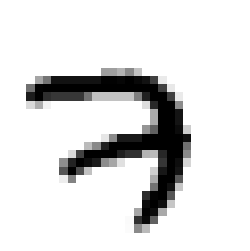

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")
plt.show()

In [141]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

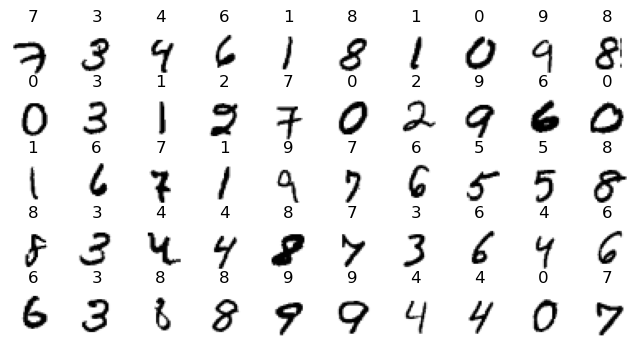

In [143]:
plt.figure(figsize=(8,4))
for idx,image in enumerate(X_train[:50]):
    plt.subplot(5,10,idx+1)
    plt.imshow(X_train[idx],cmap="binary")
    plt.title(y_train[idx])
    plt.axis("off")
plt.subplots_adjust(wspace=0.4,hspace=0.4)
    

In [145]:
K=tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self,factor):
        self.factor=factor
        self.rates=[]
        self.losses=[]

    def on_batch_end(self,batch,logs=None):
        lr=self.model.optimizer.learning_rate.numpy()*self.factor
        self.rates.append(lr)
        self.losses.append(logs["loss"])
        self.model.optimizer.learning_rate=lr

In [147]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [149]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [151]:

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,
             metrics=["accuracy"])

In [153]:
expon_lr=ExponentialLearningRate(factor=1.005)


In [155]:
history=model.fit(
    X_train,y_train,epochs=1,
    validation_data=[X_valid,y_valid],
    callbacks=[expon_lr]
)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4846 - loss: nan - val_accuracy: 0.0958 - val_loss: nan


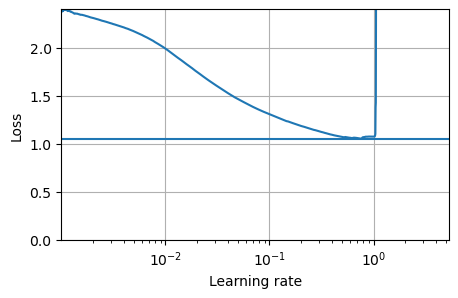

In [157]:
plt.figure(figsize=(5,3))
plt.plot(expon_lr.rates,expon_lr.losses)
plt.gca().set_xscale("log")
plt.axis([min(expon_lr.rates),max(expon_lr.rates),0,expon_lr.losses[0]])
plt.hlines(min(expon_lr.losses),min(expon_lr.rates),max(expon_lr.rates))
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.grid()


In [159]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [161]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
    
])

In [163]:
optimizer=tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [165]:
from pathlib import Path
from time import strftime

run_index=1
run_logdir=Path()/"my_mnist_logs"/"run_{:03d}".format(run_index)
run_logdir

PosixPath('my_mnist_logs/run_001')

In [167]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoints_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model.keras",save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [169]:
history=model.fit(X_train,y_train,
                 epochs=100,
                 validation_data=(X_valid,y_valid),
                 callbacks=[checkpoints_cb,early_stopping_cb,tensorboard_cb])


Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - accuracy: 0.8690 - loss: 0.4089 - val_accuracy: 0.9702 - val_loss: 0.1038
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.9699 - loss: 0.0981 - val_accuracy: 0.9772 - val_loss: 0.0846
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9805 - loss: 0.0616 - val_accuracy: 0.9766 - val_loss: 0.0854
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9874 - loss: 0.0418 - val_accuracy: 0.9766 - val_loss: 0.0823
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9890 - loss: 0.0330 - val_accuracy: 0.9762 - val_loss: 0.0922
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9912 - loss: 0.0262 - val_accuracy: 0.9756 - val_loss: 0.1033
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9929 - loss: 0.0217 - val_accuracy: 0.9772 - val_loss: 0.0964
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9947 - los

In [171]:
model = tf.keras.models.load_model("my_mnist_model.keras")

In [173]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.9714 - loss: 0.1026


[0.08437573909759521, 0.9747999906539917]